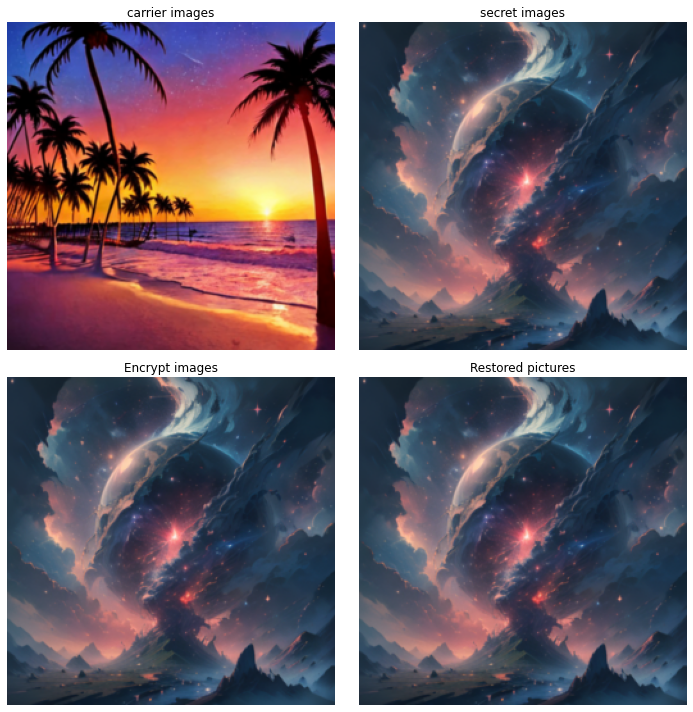

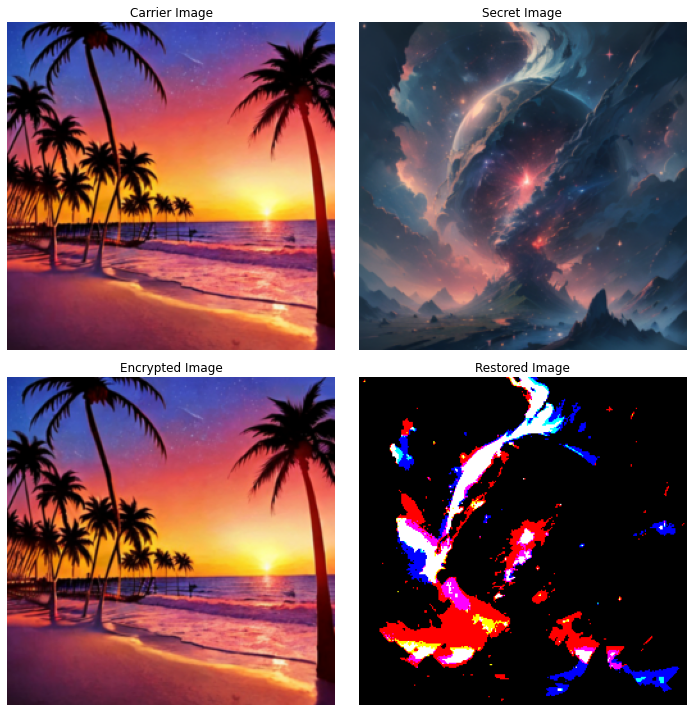

In [61]:
#LSB方法实现隐写
import torch
from PIL import Image
from matplotlib import pyplot as plt
from torchvision import transforms

# 读取图像
carrier_image = Image.open('./resource/carrier.png').convert('RGB')
secret_image = Image.open('./resource/secret1.png').convert('RGB')

# 转换图像为Tensor，并保持0-255范围
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),  # 转换为[0, 1]范围
    transforms.Lambda(lambda x: (x * 255).byte())  # 还原到[0, 255]范围并转换为整数
])
carrier_tensor = transform(carrier_image)
secret_tensor = transform(secret_image)

# 获取图像的高度和宽度
H = carrier_tensor.shape[1]
W = carrier_tensor.shape[2]

# 将Tensor展平为一维
carrier_flat = carrier_tensor.view(-1).int()  # 转换为整数
secret_flat = secret_tensor.view(-1).int()

# 隐藏秘密图像到载体图像
new_tensor_flat = (carrier_flat & 0xFE) | (secret_flat >> 7)  # 将秘密图像的最高位嵌入载体图像的最低有效位
new_tensor = new_tensor_flat.view(3, H, W)

# 从加密图像中提取秘密图像
extracted_secret_flat = (new_tensor_flat & 1) * 255  # 提取秘密图像的最低有效位
extracted_secret_tensor = extracted_secret_flat.view(3, H, W)

# 显示图像
tensor_list = [carrier_tensor, secret_tensor, new_tensor, extracted_secret_tensor]
title = ['Carrier Image', 'Secret Image', 'Encrypted Image', 'Restored Image']

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i, (tensor, ax) in enumerate(zip(tensor_list, axs.ravel())):
    ax.imshow(tensor.permute(1, 2, 0).numpy())
    ax.axis('off')
    ax.set_title(title[i])
plt.tight_layout()
plt.show()


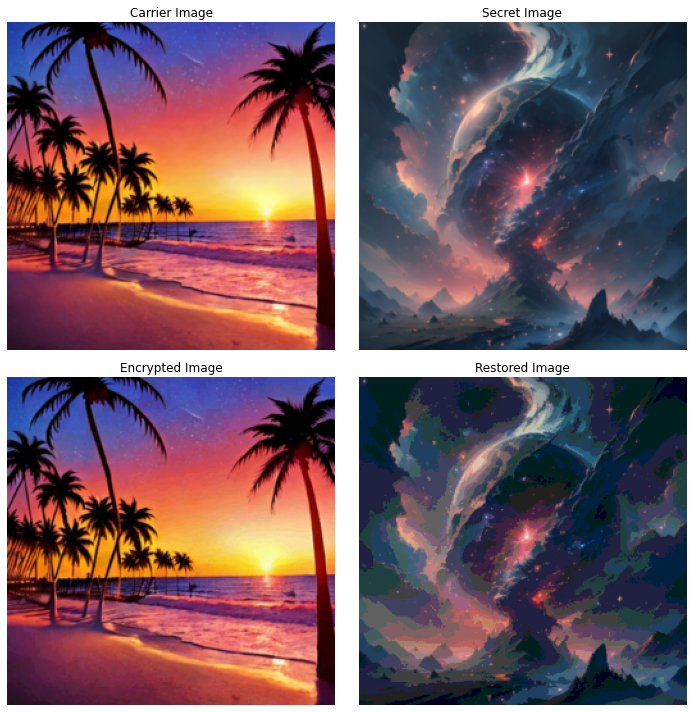

In [65]:
#将秘密图像的高三位隐藏到承载图像的低三位
from PIL import Image
from matplotlib import pyplot as plt
from torchvision import transforms

# 读取图像
carrier_image = Image.open('./resource/carrier.png').convert('RGB')
secret_image = Image.open('./resource/secret1.png').convert('RGB')

# 转换图像为Tensor，并保持0-255范围
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),  # 转换为[0, 1]范围
    transforms.Lambda(lambda x: (x * 255).byte())  # 还原到[0, 255]范围并转换为整数
])
carrier_tensor = transform(carrier_image)
secret_tensor = transform(secret_image)

# 获取图像的高度和宽度
H = carrier_tensor.shape[1]
W = carrier_tensor.shape[2]

# 将Tensor展平为一维
carrier_flat = carrier_tensor.view(-1).int()  # 转换为整数
secret_flat = secret_tensor.view(-1).int()

# 提取秘密图像的最高三位
secret_high_bits = (secret_flat >> 5) & 0x07  # 最高三位，掩码0x07为三位

# 将载体图像的最低三位清零
carrier_low_bits_cleared = carrier_flat & 0xF8  # 掩码0xF8为保留高五位，清除最低三位

# 将秘密图像的最高三位嵌入载体图像的最低三位
new_tensor_flat = carrier_low_bits_cleared | secret_high_bits

# 重新调整Tensor形状并转换为byte
new_tensor = new_tensor_flat.view(3, H, W).byte()

# 从加密图像中提取秘密图像
extracted_secret_flat = (new_tensor_flat & 0x07) << 5  # 提取最低三位并移位回原位置
extracted_secret_tensor = extracted_secret_flat.view(3, H, W).byte()

# 显示图像
tensor_list = [carrier_tensor, secret_tensor, new_tensor, extracted_secret_tensor]
title = ['Carrier Image', 'Secret Image', 'Encrypted Image', 'Restored Image']

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i, (tensor, ax) in enumerate(zip(tensor_list, axs.ravel())):
    ax.imshow(tensor.permute(1, 2, 0).numpy())
    ax.axis('off')
    ax.set_title(title[i])
plt.tight_layout()
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


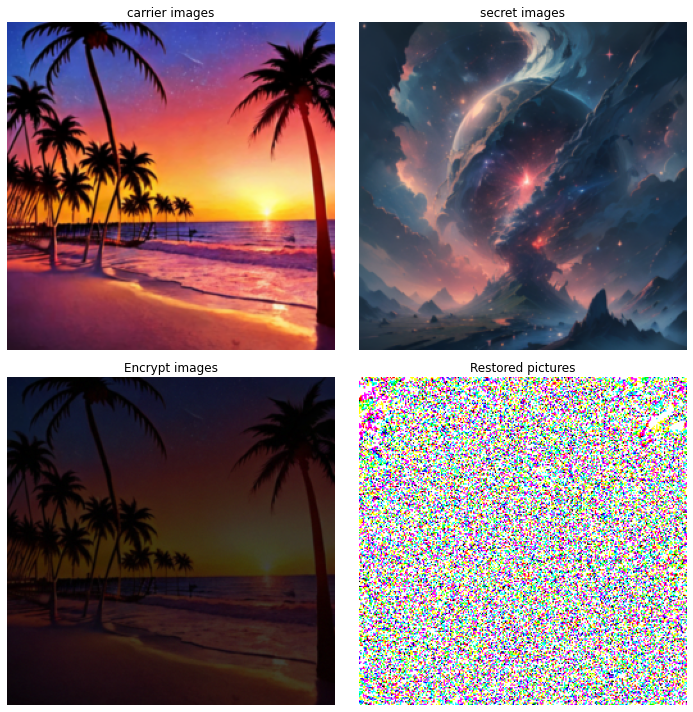